In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def powerlaw(b,n):
    """Returns a function which is a power law in one variable."""
    return lambda k : b*k**n

In [3]:
P = powerlaw(1,2)   # powerspectrum defined as a power law

In [20]:
shape = (128,128)
shape = (128,128,128)
K1 = np.array(np.meshgrid(*[np.fft.fftfreq(x) * x for x in shape[:-1]],np.fft.rfftfreq(shape[-1]) * shape[-1]))
#    print(*np.arange(len(shape),0,-1))
K = K1#.transpose(0,*np.arange(len(shape),0,-1))
# K = np.indices(shape,dtype='float')  # K vector
k = (K**2).sum(axis=0)**(1/2)    # magnitude of K vector
# k.shape
Pk = P(k)
Pk[0,0] = 0

In [21]:
K1.shape

(3, 128, 128, 65)

In [22]:
np.random.seed(840900)
FK = (np.random.randn(*k.shape) + np.random.randn(*k.shape)*1j) * np.sqrt(Pk/2)

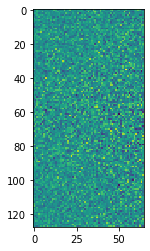

In [23]:
plt.imshow(np.real(FK[60]))
# plt.plot(Fx)

In [24]:
# from scipy.fftpack import fftn, ifftn

In [25]:
FX = np.fft.irfftn(FK)

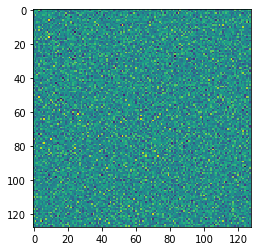

In [26]:
plt.imshow(FX[50])
# plt.plot(np.real(Fk*np.conj(Fk)))

In [27]:
F1K = np.fft.rfftn(FX)
# plt.plot(k.ravel(),np.abs(F1K.ravel())**2,'.')

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(data=np.vstack((k.ravel(),np.abs(F1K.ravel())**2)).T,columns=['k','Pk'])
df

,k,Pk
0,0.000000,2.019484e-28
1,1.000000,1.262177e-28
2,2.000000,4.102077e-29
3,3.000000,5.127596e-29
4,4.000000,5.048710e-29
...,...,...
1064955,60.016664,2.485824e+03
1064956,61.016391,7.800774e+03
1064957,62.016127,2.986531e+03
1064958,63.015871,2.204776e+03


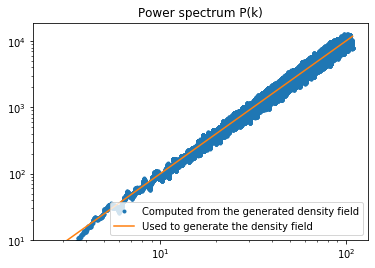

In [30]:
dfsort = df.sort_values('k')
k_av = dfsort['k'].rolling(100).mean()
Pdata_av = dfsort['Pk'].rolling(100).mean()
plt.plot(k_av,Pdata_av, '.',label='Computed from the generated density field')
plt.plot(k_av,P(k_av),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=10)
plt.title("Power spectrum P(k)")
plt.legend(loc="lower right")

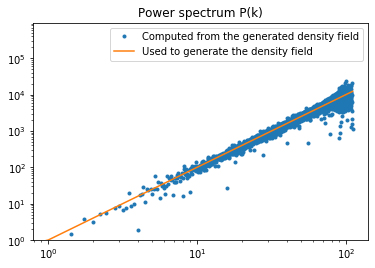

In [31]:
grouped1 = df.groupby('k').mean()
plt.plot(grouped1.index,grouped1,'.',label='Computed from the generated density field')
plt.plot(grouped1.index,P(grouped1.index),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=1)
plt.title("Power spectrum P(k)")
plt.legend()

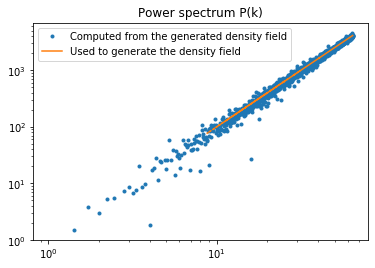

In [32]:
grouped2 = df.groupby(pd.cut(df['k'], bins=np.linspace(df['k'].iloc[0],df['k'].iloc[-1], 2000))).mean()
plt.plot(grouped2['k'],grouped2['Pk'],'.',label='Computed from the generated density field')
plt.plot(grouped2['k'],P(grouped2['k']),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=1)
plt.title("Power spectrum P(k)")
plt.legend()

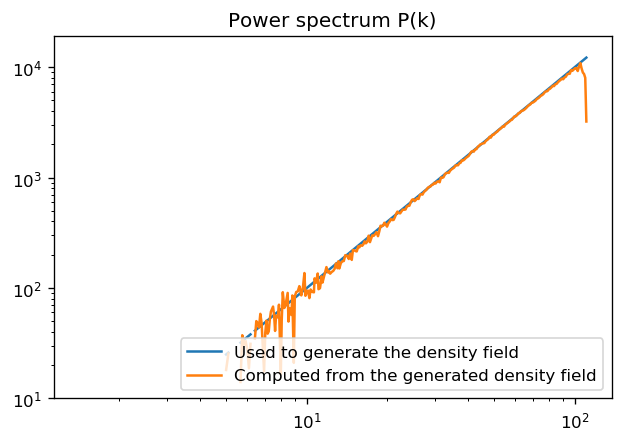

In [33]:
plt.figure(dpi=120)
grouped3 = df.groupby(pd.cut(df['k'], bins=np.logspace(0.1,5, 1000))).mean()
plt.plot(grouped3['k'],P(grouped3['k']),'-',label='Used to generate the density field')
plt.plot(grouped3['k'],grouped3['Pk'],'-',label='Computed from the generated density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=10)
plt.title("Power spectrum P(k)")
plt.legend(loc="lower right")

<IPython.core.display.Javascript object>


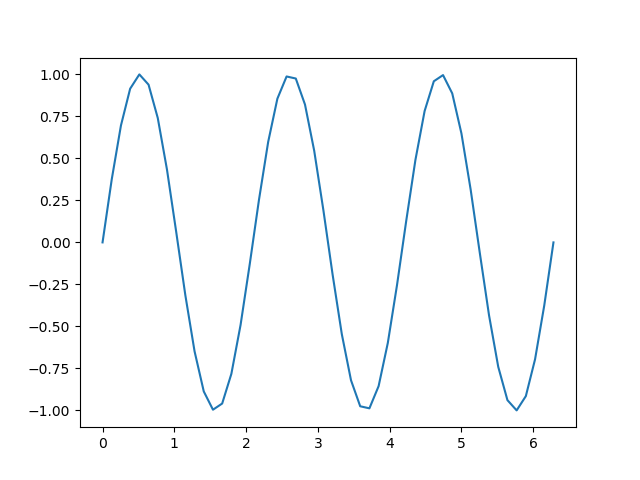

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [49]:
a = np.zeros((2, 3, 2))

a[0, 1, 0]= 3 * 2 * 2

np.fft.ifftn(a)

array([[[ 1. +0.j       ,  1. +0.j       ],
        [-0.5+0.8660254j, -0.5+0.8660254j],
        [-0.5-0.8660254j, -0.5-0.8660254j]],

       [[ 1. +0.j       ,  1. +0.j       ],
        [-0.5+0.8660254j, -0.5+0.8660254j],
        [-0.5-0.8660254j, -0.5-0.8660254j]]])

In [66]:
np.fft.fftfreq(5)*5

array([ 0.,  1.,  2., -2., -1.])

In [26]:
import main

In [28]:
main._power_law(1,1)

<function main._power_law.<locals>.<lambda>(k)>

In [19]:
# import sys, os
# sys.path

In [20]:
import yt

In [56]:
# dir(yt)

In [17]:
# from scipy.ndimage import correlate

In [18]:
# corr = correlate(np.abs(FX),np.abs(FX),mode='nearest')

In [19]:
# corr.shape

In [20]:
# plt.imshow(corr)

In [21]:
# Pcor = fftn(corr)

In [22]:
# plt.imshow(np.abs(Pcor))

In [23]:
# np.abs(Pcor)

In [24]:
%matplotlib inline

In [25]:
np.fft.fftfreq(10) * 10

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

In [26]:
128*128

16384

In [27]:
# plot = plt.hist(np.real(F1K),bins=300)

In [28]:
# plt.hist(Fx,bins=30)

In [29]:
K[:,1,3,0]

array([1., 3., 0.])